# ***Engr.Muhammad Javed***

## **Multiple Linear Regression:**

## *Importing Required Libraries*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler , FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector

## *Loading the Dataset*


In [7]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Salary_Data[1].csv")

## *Show Dataset*


In [8]:
Dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## *Viewing Statistical Summary of the Dataset*


In [9]:
Dataset.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## *Checking Dataset Information*


In [10]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## *Removing Unnecessary Columns from the Dataset*


In [13]:
Dataset.drop(["Gender" , "Education Level" , "Job Title"] ,axis = 1, inplace= True)

## *Show Dataset*


In [14]:
Dataset

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0
6702,46.0,14.0,140000.0


## *Viewing Statistical Summary of the Dataset*


In [15]:
Dataset.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## *Checking Dataset Information*


In [16]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Years of Experience  6701 non-null   float64
 2   Salary               6699 non-null   float64
dtypes: float64(3)
memory usage: 157.3 KB


## *Checking for Missing Values in the Dataset*


In [17]:
Dataset.isnull().sum()

Age                    2
Years of Experience    3
Salary                 5
dtype: int64

## *Filling Missing Age Values with Mean, Experience Mean, and Salary Mode*


In [20]:
Dataset["Age"].fillna(Dataset["Age"].mode()[0] , inplace = True)
Dataset["Salary"].fillna(Dataset["Salary"].mean() , inplace = True)
Dataset["Years of Experience"].fillna(Dataset["Years of Experience"].mode()[0] , inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23044\1197328790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset["Age"].fillna(Dataset["Age"].mode()[0] , inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23044\1197328790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

## *Checking for Missing Values in the Dataset*


In [21]:
Dataset.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

## *Visualizing Relationships Between All Features Using Pairplot*


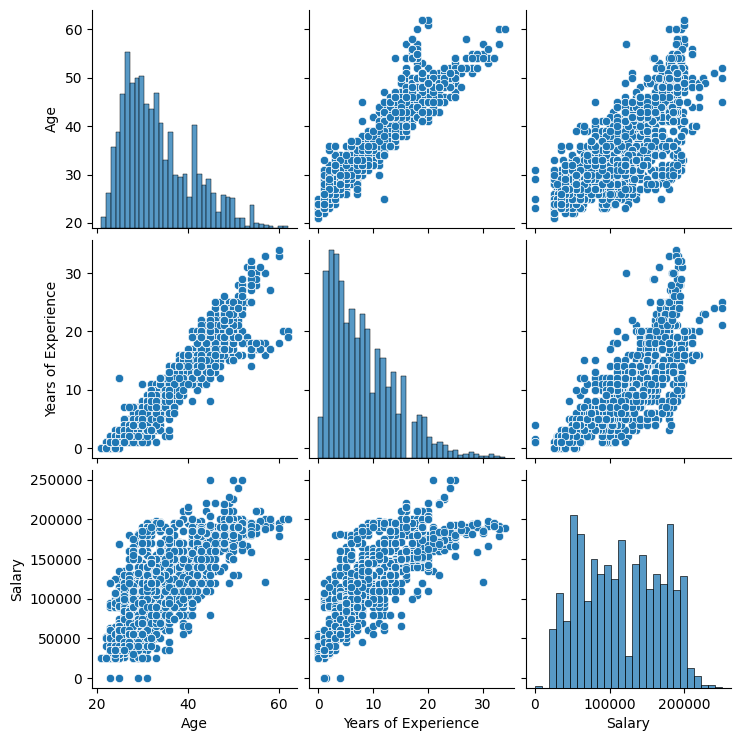

In [23]:
sn.pairplot(data = Dataset)
plt.show()

## *Visualizing Correlation Between Features Using Heatmap*


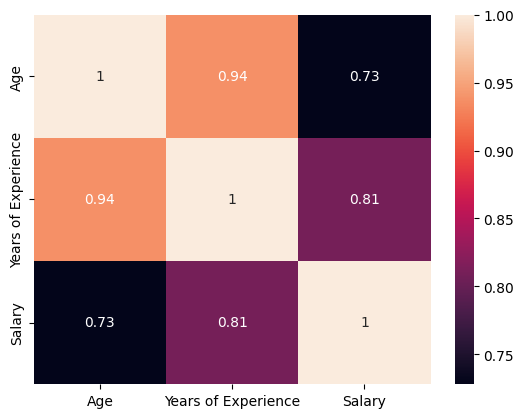

In [24]:
sn.heatmap(data = Dataset.corr(), annot= True)
plt.show()

In [25]:
Dataset

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0
6702,46.0,14.0,140000.0


## *Splitting Features and target Variable*


In [26]:
x = Dataset.iloc[: , : -1]
y = Dataset["Salary"]


## *Splitting Dataset into Training and Testing Sets*


In [27]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state= 45 , test_size=0.2)

## *Training the Linear Regression Model*


In [28]:
Lr = LinearRegression()
Lr.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
Lr.score(x_test , y_test)*100

64.51347776627043

## **Algorithm**

- y = m1x1 + m2x2 + m3x3 ....... + c

In [31]:
Lr.coef_


array([-1639.41525308,  8980.19950081])

In [32]:
Lr.intercept_

np.float64(97895.38172226427)

In [33]:
# y_pred = 1639.41525308*Age - 8980.19950081*Experience + 97895.38172226427

In [34]:
Lr.predict(x_test)

array([ 86273.13738628, 117275.68963027, 179207.62533603, ...,
       110718.02861797,  82211.1836447 ,  65890.19989616], shape=(1341,))